# **Cinética Enzimática** ***in silico***

## Instalación de modulos y descarga de datos

In [ ]:
%%capture out
# Instala extensiones para widgets interactivos
!pip install jupyter_contrib_nbextensions
!jupyter contrib nbextension install
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
# Modulos necesarios para ejecutar el código

import os                             # Modulo para operaciones a nivel de Sistema Operativo
import sys                            # Operaciones a nivel de sistema (para añadir rutas)
import math                           # Operaciones matemáticas
import numpy as np                    # Creación y manejo de arreglos, además de operaciones con estos
import pandas as pd                   # Manejo y operaciones con bases de datos grandes
import matplotlib                     # Creación de gráficos
import matplotlib.pyplot as plt       # Módulo específico de gráficos
import warnings                       # Utilizado para silenciar ciertas advertencias
import csv                            # Importar, exportar, leer y escribir archivos .csv
import scipy.stats                    # Módulo científico estadístico
import nbconvert                      # Para convertir cuadernillo a PDF
import ipywidgets as widgets          # Utilizado para crear outputs interactivos
import IPython                        # Utilizado para el manejo del output
from IPython.display import HTML      # Renderiza HTML en el output

# Disminuye la verbosidad de matplotlib al crear gráficos
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# Utilizado para dar distintos estilos a matplotlib
# y que los gráficos se muestren en línea con el código
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
%%capture out
# Finalmente acá se importa un módulo diseñado para este curso y un set de datos para visualizar
!wget https://raw.githubusercontent.com/AlejoArav/BIO266E/master/GoogleColab/python_files/cinetica_enzimatica_estudiantes_bio266.py
!wget https://raw.githubusercontent.com/AlejoArav/BIO266E/master/GoogleColab/final_data/ph_data.csv
!wget https://raw.githubusercontent.com/AlejoArav/BIO266E/master/GoogleColab/final_data/temp_data.csv
!wget https://raw.githubusercontent.com/AlejoArav/BIO266E/master/GoogleColab/final_data/progress_curve_data.csv
!wget https://raw.githubusercontent.com/AlejoArav/BIO266E/master/GoogleColab/final_data/micment_data.csv
!wget https://raw.githubusercontent.com/AlejoArav/BIO266E/master/GoogleColab/final_data/comp_inhibitor_data.csv
!wget https://raw.githubusercontent.com/AlejoArav/BIO266E/master/GoogleColab/final_data/mixed_inhibitor_data.csv
!wget https://raw.githubusercontent.com/AlejoArav/BIO266E/master/GoogleColab/final_data/uncomp_inhibitor_data.csv
sys.path.append('/content/')
%cd "/content/"
import cinetica_enzimatica_estudiantes_bio266 as ce

# **Introduccion**


La **β-galactosidasa** de E. coli es una enzima cuya función en la naturaleza es la degradación de disacáridos β-galactósidos con enlace beta a monosacáridos, entre ellos, degradar la lactosa a glucosa y galactosa. El sustrato usado en esta actividad será **o-nitrofenil-β-D-galactopiranósido** (**oNPGal**), este es un sustrato sintético que también es hidrolizado por la enzima. Se utiliza este oNPGal porque el método de ensayo resulta más simple que emplear el sustrato natural lactosa, ya que uno de los productos de la reacción, o-nitrofenol (oNF), absorbe a 420 nm y se puede cuantificar colorimétricamente.

En este trabajo se efectuará una caracterización de la β-galactosidasa de E. coli comercial *in silico*, contemplando los efectos del pH, la temperatura y diferentes inhibidores sobre la tasa de reacción.

# **Efecto del pH sobre la tasa de reacción**

**Ensayo Experimental**

Se determinará la velocidad de reacción a diferentes pHs y se graficará el procentaje de actividad relativa en función del pH, considerando como 100% la mayor actividad obtenida en este ensayo. De esta forma se determinará el pH óptimo de la enzima. Cada incubación de realizará por el tiempo y la cantidad de enzima determinada en la actividad anterior a temperatura de 37ºC. Cuando se hable en estos apuntes de "velocidad de la reacción", siempre se estará refiriendo a la velocidad inicial.

Se usarán 5 amortiguadores:	- acetato de sodio 50 mM pH 3.5
- citrato de sodio 50 mM pH 5.0
- fosfato de sodio 50 mM pH 6.4
- fosfato de sodio 50 mM pH 7.2
- carbonato de sodio 50 mM pH 10.0

A cada tubo se le agregará:
200 μl de agua
100 μl del amortiguador respectivo
100 μl oNPgal 3mg/ml
100 μl de la dilución de enzima

Luego de la incubación a 37ºC se agregará 500 μl de Na2CO3 1M pH 10 para detener la reacción.

Cada tubo de reacción debe tener un control negativo de forma que la hidrólisis espontánea del sustrato por efecto del pH, quede descartada. Para esto debe realizar tubos extra con la misma mezcla anterior, pero reemplazando los 100 µl de la dilución de enzima por 100 µl de agua (total de 300 µl de agua y sin enzima) y proceder de igual forma que en el paso anterior. Esta mezcla debe ser realizada para cada pH analizado y corresponderá al blanco y debe ser usado como tal a la hora de realizar las mediciones espectrofotométricas.


<p align="center">
<img src="https://raw.githubusercontent.com/AlejoArav/BIO266E/master/imgs/efectoPH.png" alt="drawing" width="400"/>
</p>

**Teoría y supuestos detrás de la formulación matemática**

- Las curvas con forma de campana que se obtienen al realizar los ensayos enzimáticos a diferentes concentraciones de pH pueden formularse matemáticamente si se considera a la enzima como un **ácido dibásico**.

- La enzima considerada como un ácido dibásico ($\text{H}_{2}\text{E}$) posee **dos constantes de disociación**, $K_{E1}$ y $K_{E2}$, y el complejo de enzima-sustrato ($\text{H}_{2}\text{EA}$) se comporta de igual forma, con constantes de disociación $K_{EA1}$ y $K_{EA2}$. Además, se considera que el complejo enzima-sustrato con un solo sitio ionizado ($\text{H}_{1}\text{EA}^{-}$) es el único estado enzimáticamente activo (aunque el sustrato puede unirse sin problemas a cualquier estado del complejo $\text{EA}$).

- La figura expuesta considera que nos encontramos frente a la reacción enzimática más simple según los mecanismos de Michaelis-Menten, considerando solamente dos pasos ($\text{E + A} \leftrightarrows \text{EA} \rightarrow \text{E + P}$)

- Por último, puede que no siempre se cumpla el supuesto que el estado con un solo sitio ionizado sea el estado activo, sin embargo es razonable realizar este supuesto considerando que una gran cantidad de actividades enzimáticas medidas decaen rápidamente a valores bajos y altos de pH.

**Relación entre los parámetros cinéticos y el pH**

$$
\widetilde{V}_{m} = \frac{V_{m}}{\frac{[\text{H}]}{K_{EA1}} + 1 + \frac{K_{EA2}}{[\text{H}]}}
$$
$$
\
$$
$$
\widetilde{K}_{m} = \frac{K_{m}\bigg(\frac{[\text{H}]}{K_{E1}} + 1 + \frac{K_{E2}}{[\text{H}]} \bigg)}{\frac{[\text{H}]}{K_{EA1}} + 1 + \frac{K_{EA2}}{[\text{H}]}}
$$

Ecuación de MM dependiente de pH:

$$
\widetilde{v} = \frac{\widetilde{V}_{m}[S]}{\widetilde{K}_{m} + [S]}
$$

$$
V_m = k_{cat}[E]_{0}
$$

In [ ]:
# Gráfico pH
# Recomiendo no cambiar parametros de esta funcion
ce.interactive_ph_graph(np.linspace(1, 14, 14*4), ce.fit_micment_ph)

AppLayout(children=(HTML(value='<H1><center>Gráfico Interactivo pH - Enzimas</center></H1>', layout=Layout(gri…

## **Preguntas a desarrollar**

**¿Por qué algunas enzimas tienen actividades óptimas a pHs básicos, mientras que otras a pHs ácidos? ¿De qué depende esto?**

**Las enzimas poseen un pH óptimo en el cual se maximiza su actividad, y fuera de este rango pierden actividad rápidamente ¿Qué sucede a nivel estructural/aminoacídico en las enzimas que provoca esta perdida de actividad?**

**¿Cómo se puede definir el $pK_a$? ¿Por qué se debe definir un $pK_a$ para la enzima por si sola y otro $pK_a$ para el complejo Enzima-Sustrato? Fundamente su respuesta.**

# **Efecto de la temperatura sobre la tasa de reaccion**

**Ensayo experimental**

Se determinará la velocidad de reacción a diferentes temperaturas y se graficará el porcentaje de actividad relativa en función de la Tº, considerando como 100% la mayor actividad obtenida en este ensayo de temperatura. De esta forma se determinará la temperatura óptima de la enzima. Se utilizarán 5 condiciones de temperatura.

Cada tubo contendrá:
200 μl de agua
100 μl Fosfato 50 mM pH 7.2
100 μl de oNPGal 3 mg/ml
Luego de mezclar bien, se agrega 100 μl de la dilución de enzima.

Al igual que en la actividad anterior, cada tubo de reacción debe tener un control negativo de forma que la hidrólisis espontánea del sustrato por efecto de temperatura quede descartada. Para esto debe realizar tubos extra con la misma mezcla anterior, pero reemplazando los 100 µl de la dilución de enzima por 100 µl de agua (total de 300 µl de agua y sin enzima) y proceder de igual forma que en el paso anterior. Esta mezcla debe ser realizada para cada temperatura y corresponderá al blanco.


<p align="center">
<img src="https://raw.githubusercontent.com/AlejoArav/BIO266E/master/imgs/efectoTEMP.png" alt="drawing" width="400"/>
</p>

**Teoría y supuestos detrás de la formulación matemática**

- La mayoría de las enzimas se denaturan al estar en ambientes con temperaturas mucho mayor a las fisiológicas (considerando claramente la fisiología del organismo en cuestión). Este aumento de temperatura generalmente conlleva a un **cambio conformacional irreversible**, con la consiguiente pérdida de actividad catalítica. Sin embargo, para modelar los cambios en la cinética enzimática es conveniente considerar un mecanismo de denaturación **reversible**, y otro paso que considera una inactivación completa de la enzima **irreversible**.

- Considerando lo anterior, el efecto de denaturación por temperatura puede observarse considerando el ejemplo de la figura anterior, donde existe una enzima ($\text{E}$) en equilibrio con su forma inactiva ($\text{E}^{\prime}$), además de existir una tasa de denaturación completa $k_{\text{inact}}$.

- Este modelo es conocido como el modelo de equilibrio para la cinética enzimática y ha sido ajustado correctamente a una gran variedad de enzimas. Para su derivación se consideró la teoría de transición de estados, utilizando la ecuación de Eyring (similar a la de Arrhenius, sin embargo, se basa en la teoría de mecánica estadística)
$$
\
$$
$$
k_{\text{cat}} = \frac{k_{\text{B}}T}{h}\exp \bigg(-\frac{\Delta G^{0}_{\text{cat}}}{RT} \bigg)
$$
$$
\
$$
$$
k_{\text{inact}} = \frac{k_{\text{B}}T}{h}\exp \bigg(-\frac{\Delta G^{0}_{\text{inact}}}{RT} \bigg)
$$
$$
\
$$
Ahora podemos definir nuestra constante de equilibrio térmico $K_{\text{eq}}$:
$$
\
$$
$$
K_{\text{eq}} = \exp \bigg(\frac{\Delta H_{\text{eq}}}{R} \cdot \bigg(\frac{1}{T_{\text{eq}}} - \frac{1}{T} \bigg) \bigg)
$$
$$
\
$$
Con nuestra constante de equilibrio definida podemos definir finalmente cómo depende la tasa de reacción máxima con la temperatura:

$$
\
$$
$$
\widetilde{V}_{\text{m}} = \frac{k_{\text{cat}} \text{E}_{0} \exp \bigg( -\frac{k_{\text{inact}} K_{\text{eq}}}{1 + K_{\text{eq}}} \bigg)}{1 + K_{\text{eq}}}
$$
$$
\
$$

Como se puede observar hay una gran cantidad de parámetros involucrados pero todos se pueden interpretar en el contexto bioquímico. Por ejemplo, la temperatura de equlibrio $T_{\text{eq}}$ (la cual puede considerarse como el equivalente térmico de $K_{m}$) corresponde a la temperatura a la cual la **mitad de la enzima se encuentra en su forma activa y la otra mitad en su forma inactiva**. Esta propiedad esta intrínsecamente relacionada con el ambiente natural de la enzima y el organismo de donde proviene, por lo que se correlaciona con la temperatura de crecimiento óptima de un organismo (generalmente se encuentra en un rango de $\pm 20°C$ de la temperatura de crecimiento).

El cambio entálpico del equilibrio ($\Delta H_{\text{eq}}$) determinará el **rango de temperaturas donde se obtiene el equilibrio químico** y por lo tanto la habilidad de la enzima para funcionar a diferentes rangos de temperaturas. Si tenemos un $\Delta H_{\text{eq}}$ **grande**, la enzima tendrá un rango óptimo de temperatura angosto, mientras que menor sea el $\Delta H_{\text{eq}}$, mayor será el rango de temperatura óptimo para la enzima (la actividad enzimática será menos sensible a cambios en temperatura).

In [ ]:
# Gráfico Temperatura
# Recomiendo no cambiar parametros de esta funcion
# Los valores se encuentran expresados en Joules
ce.interactive_temp_graph(np.linspace(273, 383, (383-273)*2), ce.fit_micment_temp)

AppLayout(children=(HTML(value='<H1><center>Gráfico Interactivo Temperatura - Enzimas</center></H1>', layout=L…

## **Preguntas a desarrollar**

**¿Por qué se observa un peak de actividad a cierta temperatura y después una bajada abrupta de actividad?**

**¿La inactivación enzimática por temperatura es reversible o irreversible? Fundamente su respuesta**

# Efecto de Inhibidores sobre la tasa de reaccion

## Inhibición Competitiva

<p align="center">
<img src="https://raw.githubusercontent.com/AlejoArav/BIO266E/master/imgs/inhibidorComp.png" alt="drawing" width="400"/>
</p>

Un inhibidor competitivo es aquel que compite con el sustrato por el sitio activo de la enzima. Este mecanismo puede apreciarse en la figura, donde $\text{EI}$ representa un *dead-end complex* (la única reacción en la que se encuentra involucrado el complejo es su propia disociación).

A partir del diagrama podemos obtener la constante de equilibrio del complejo enzimatico con su inhibidor, denominada $K_{ic} = \frac{[E][I]}{[EI]}$. También es conocida como la constante de inhibición competitiva.

**IMPORTANTE**: Este supuesto de equilibrio no siempre se cumple, y un caso particular donde no se cumple es en la **inhibición por producto**, donde el complejo $[EI]$ puede estar involucrado en otra reacción a parte de su disociación.

La ecuación modificada de Michaelis-Menten para los inhibidores competitivos es:
$$
\
$$
$$
v = \frac{V_{m} [\text{S}]}{K_{m} \cdot (1 + \frac{[I]}{K_{ic}}) + [\text{S}]}
$$
$$
\
$$

En palabras más simples, **aumenta** el valor aparente de la $K_m$, sin afectar la $V_m$ observada.

> Qué implicaría un incremento en la $K_m$ en cuanto al sustrato?

In [ ]:
# Gráfico interactivo inhibidor competitivo (Curva de Michaelis-Menten)
ce.interactive_comp_inhibitor_graph1(np.linspace(0, 10000, 10000//10), ce.fit_micment_comp_inhibitor)

AppLayout(children=(HTML(value='<H1><center>Gráfico Interactivo de Inhibidores Competitivos</center></H1>', la…

In [ ]:
# En primer lugar se debe leer el archivo que contiene los datos
ruta_de_archivo = "comp_inhibitor_data.csv"
datos_inhibcomp = pd.read_csv(ruta_de_archivo)
datos_inhibcomp

substrate_concentration  ...  comp_inhibitor_300000.0_um
0                      0.0000  ...                    0.635085
1                      2.0004  ...                    0.000000
2                      4.0008  ...                    0.000000
3                      6.0012  ...                    0.000000
4                      8.0016  ...                    0.351666
...                       ...  ...                         ...
4995                9991.9984  ...                    6.207877
4996                9993.9988  ...                    6.205850
4997                9995.9992  ...                    5.286106
4998                9997.9996  ...                    5.232496
4999               10000.0000  ...                    5.259592

[5000 rows x 6 columns]

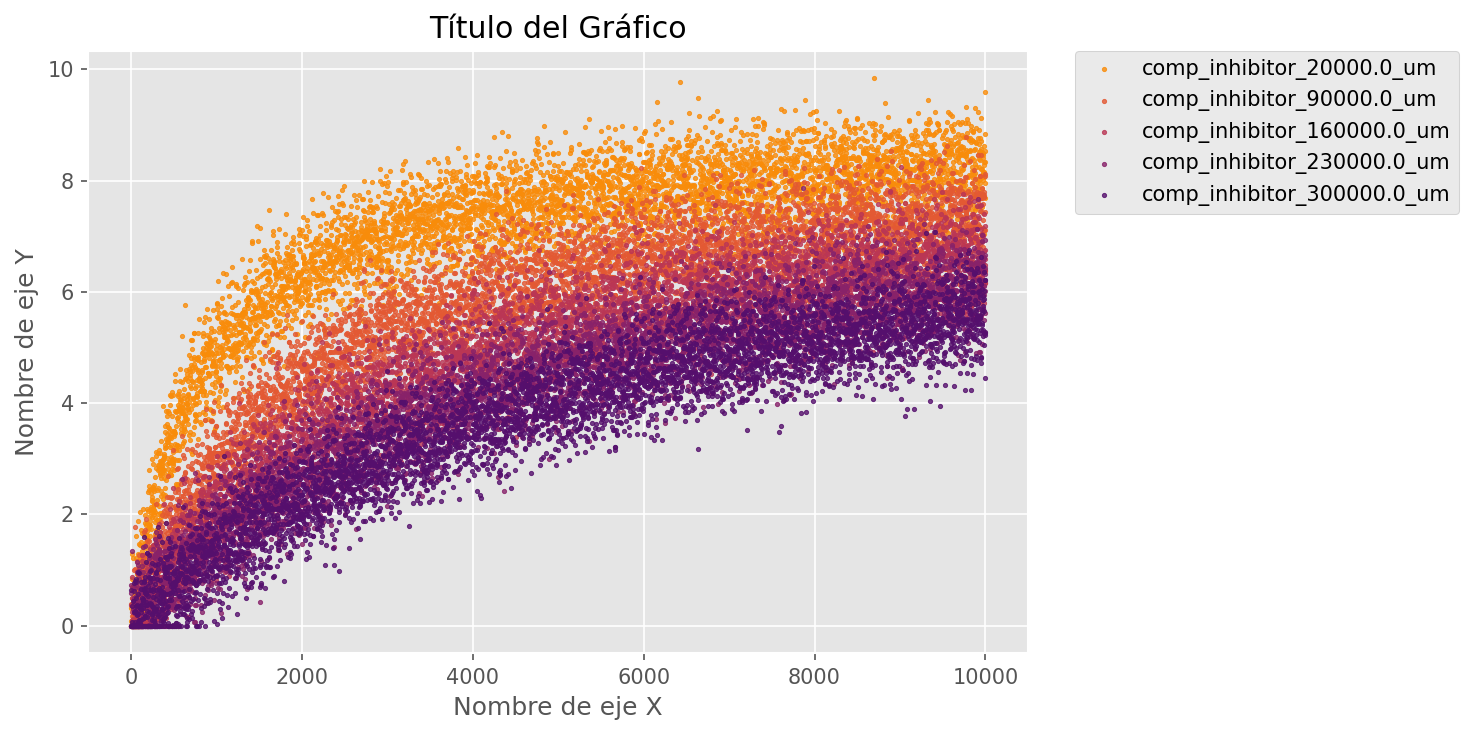

In [ ]:
colores = plt.cm.inferno_r(np.linspace(0.25, 0.75, len(list(datos_inhibcomp.columns))-1))

# Se crea la figura y un objeto ax
fig, ax = plt.subplots(figsize=(10,5), dpi=150)

# Se realiza un bucle para graficar todos los datos en una misma figura
for i in range(1, len(list(datos_inhibcomp.columns))):
    datos_inhibcomp.plot(
        datos_inhibcomp.columns[0],
        datos_inhibcomp.columns[i],
        kind='scatter',
        color=colores[i-1],
        alpha=0.8,
        s=4,
        ax=ax,
        label=datos_inhibcomp.columns[i])

plt.title("Título del Gráfico")     # Modificar de acuerdo a lo graficado
plt.ylabel("Nombre de eje Y")       # Modificar de acuerdo a lo graficado
plt.xlabel("Nombre de eje X")       # Modificar de acuerdo a lo graficado

# Opciones para ajustar la distribución de objetos en el gráfico
# No modificar a menos que desee experimentar!
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

In [ ]:
# Ajustar curvas

# Datos deben ser transformados a arreglos numpy para ser ajustados
# IMPORTANTE: Para cambiar de columna se debe cambiar el índice de la columna datos_y
# (donde dice datos_inhibcomp.columns[indice])
datos_x_inhibcomp = datos_inhibcomp[datos_inhibcomp.columns[0]].to_numpy()
datos_y_inhibcomp = datos_inhibcomp[datos_inhibcomp.columns[2]].to_numpy()

# Se ajustan los datos experimentales a los predichos por el modelo
resultados_ajuste = ce.ajustar_modelo(ce.fit_micment_comp_inhibitor, datos_x_inhibcomp, datos_y_inhibcomp)

# resultados_ajuste es un diccionario que tiene dos llaves:
# "prediccionesModelo": la cual corresponde a un arreglo de datos generados por el modelo
# "difDatosModelo": la cual corresponde a un arreglo de datos y se utilizará para graficar los residuales

Por favor ingrese el límite inferior de búsqueda para inhibitor_concentration : 
80000
Por favor ingrese el límite superior de búsqueda para inhibitor_concentration : 
100000
Por favor ingrese el límite inferior de búsqueda para k_ic : 
0
Por favor ingrese el límite superior de búsqueda para k_ic : 
100000
Por favor ingrese el límite inferior de búsqueda para initial_enzyme : 
0
Por favor ingrese el límite superior de búsqueda para initial_enzyme : 
0.01
Parámetros Ajustados:
inhibitor_concentration : 95334.37881156891
k_ic : 27366.68334676132
initial_enzyme : 1.7061938046527842e-05

A partir de los parámetros ajustados se calcula la V_max y Km:

V_max: 0.1468
Km: 2017.6167


R cuadrado : 0.922796234793618


In [ ]:
60*0.1468

8.808000000000002

**IMPORTANTE**: $V_m$ se encuentra en $\frac{\mu M}{\text{seg}}$, para convertir a $\frac{\mu M}{\text{min}}$ simplemente multiplique el valor por 60.

Text(0.5, 0, 'Nombre de eje X')

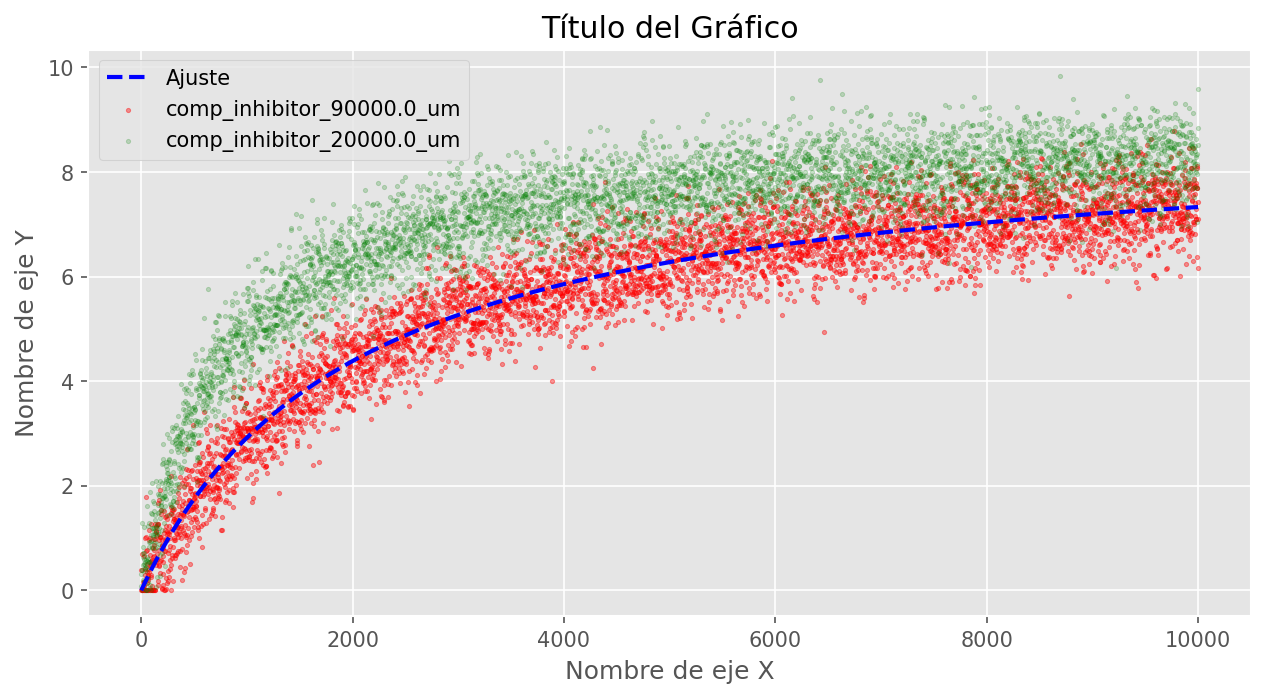

In [ ]:
# Veamos qué tan bien se ajusta el modelo a los datos experimentales
fig, ax = plt.subplots(figsize=(10,5), dpi=150)

# Primero se graficarán los datos experimentales
datos_inhibcomp.plot(
        datos_inhibcomp.columns[0],
        datos_inhibcomp.columns[2],
        kind='scatter',
        color="r",
        alpha=0.4,
        s=4,
        ax=ax,
        label=datos_inhibcomp.columns[2])

# Inhibidor 20000 uM
datos_inhibcomp.plot(
        datos_inhibcomp.columns[0],
        datos_inhibcomp.columns[1],
        kind='scatter',
        color="g",
        alpha=0.2,
        s=4,
        ax=ax,
        label=datos_inhibcomp.columns[1])

# Luego se graficarán los datos obtenidos mediante el modelo
ax.plot(
    datos_x_inhibcomp,
    resultados_ajuste["prediccionesModelo"],
    color="b",
    alpha=1.0,
    lw=2.0,
    ls="--",
    label="Ajuste")

plt.legend()
plt.title("Título del Gráfico")     # Modificar de acuerdo a lo graficado
plt.ylabel("Nombre de eje Y")       # Modificar de acuerdo a lo graficado
plt.xlabel("Nombre de eje X")       # Modificar de acuerdo a lo graficado

## Inhibición Mixta

<p align="center">
<img src="https://raw.githubusercontent.com/AlejoArav/BIO266E/master/imgs/inhibidorMixt.png" alt="drawing" width="400"/>
</p>

Michaelis junto a otres colaboradores observaron que ciertos inhibidores actuaban disminuyendo la $V_m$ observada, sin un efecto significativo sobre la $K_m$. Este tipo de inhibición es **muy poco común**, y generalmente se considera un tipo especial de ***inhibición mixta***. El mecanismo de reacción de una reacción enzimática con inhibición mixta se encuentra ilustrado en la figura.

La inhibición mixta es aquella en la cual existe una disminución de la $V_m$ y además un aumento en la $K_m$, de acuerdo con las siguientes ecuaciones:
$$
\
$$
$$
\widetilde{V}_{m} = \frac{V_{m}}{1 + \frac{[I]}{K_{iu}}}
$$
$$
\
$$
$$
\
$$
$$
\widetilde{K}_{m} = \frac{K_{m}\bigg( 1 + \frac{[I]}{K_{ic}} \bigg)}{1 + \frac{[I]}{K_{iu}}}
$$
$$
\
$$

Y finalmente podemos reemplazar en nuestra ecuación de Michaelis-Menten:
$$
\
$$
$$
v = \frac{\widetilde{V}_{m} [\text{S}]}{\widetilde{K}_{m} +[\text{S}] }
$$
$$
\
$$

In [ ]:
# Gráfico Inhibidores No-Competitivos
# Recomiendo no cambiar parametros de esta funcion
ce.interactive_mixed_inhibitor_graph1(np.linspace(0, 10000, 10000//10), ce.fit_micment_mixed_inhibitor)

AppLayout(children=(HTML(value='<H1><center>Gráfico Interactivo de Inhibidores Mixtos</center></H1>', layout=L…

In [ ]:
# En primer lugar se debe leer el archivo que contiene los datos
ruta_de_archivo = "mixed_inhibitor_data.csv"
datos_inhibnocomp = pd.read_csv(ruta_de_archivo)
datos_inhibnocomp

substrate_concentration  ...  mixed_inhibitor_300000.0_um
0                      0.0000  ...                     0.996236
1                      2.0004  ...                     0.433553
2                      4.0008  ...                     0.156766
3                      6.0012  ...                     0.000000
4                      8.0016  ...                     0.000000
...                       ...  ...                          ...
4995                9991.9984  ...                     3.593496
4996                9993.9988  ...                     4.059711
4997                9995.9992  ...                     4.022848
4998                9997.9996  ...                     4.464975
4999               10000.0000  ...                     4.018932

[5000 rows x 6 columns]

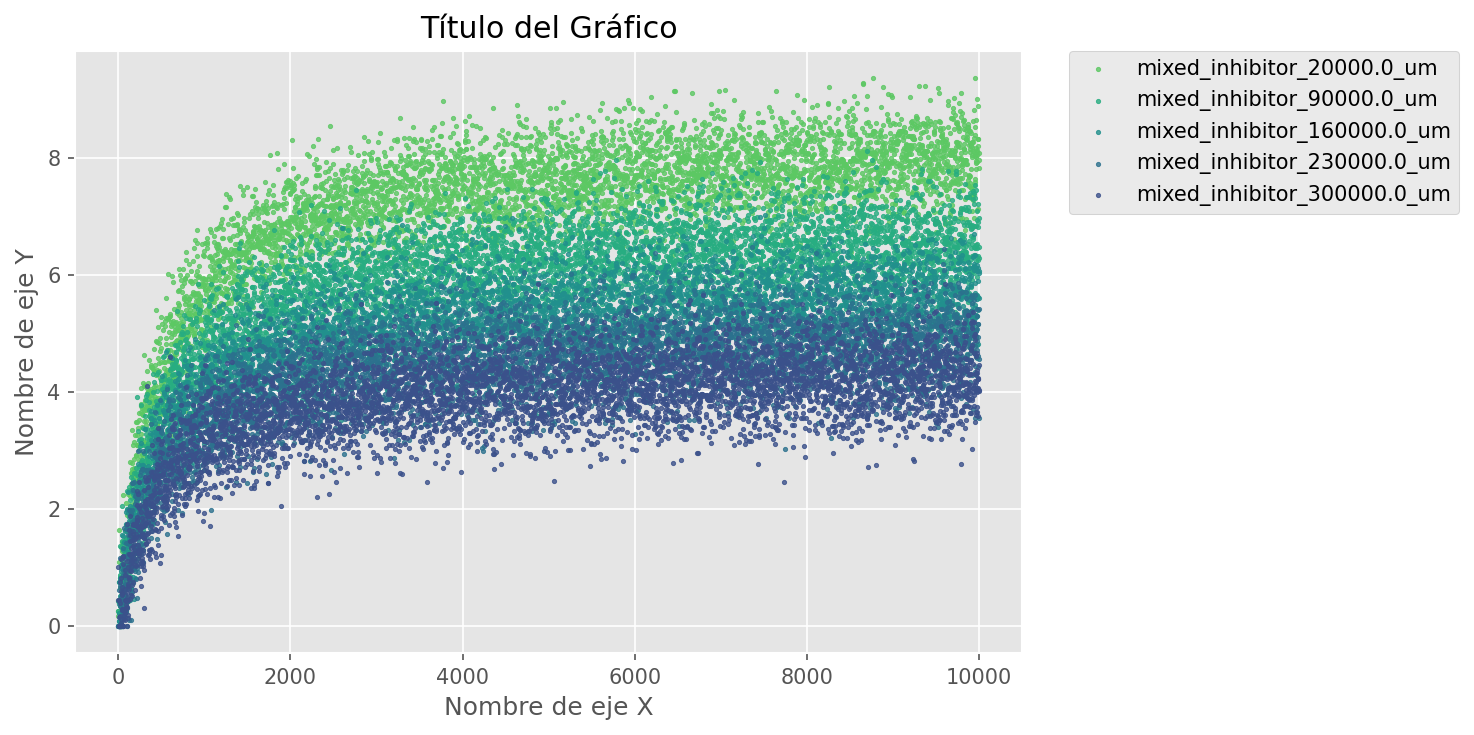

In [ ]:
colores = plt.cm.viridis_r(np.linspace(0.25, 0.75, len(list(datos_inhibnocomp.columns))-1))

# Se crea la figura y un objeto ax (recuerde que el objeto ax será donde se grafiquen las curvas)
fig, ax = plt.subplots(figsize=(10,5), dpi=150)

# Se realiza un bucle para graficar todos los datos en una misma figura
for i in range(1, len(list(datos_inhibnocomp.columns))):
    datos_inhibnocomp.plot(
        datos_inhibnocomp.columns[0],
        datos_inhibnocomp.columns[i],
        kind='scatter',
        color=colores[i-1],
        alpha=0.8,
        s=4,
        ax=ax,
        label=datos_inhibnocomp.columns[i])

plt.title("Título del Gráfico")     # Modificar de acuerdo a lo graficado
plt.ylabel("Nombre de eje Y")       # Modificar de acuerdo a lo graficado
plt.xlabel("Nombre de eje X")       # Modificar de acuerdo a lo graficado

# Opciones para ajustar la distribución de objetos en el gráfico
# No modificar a menos que desee experimentar!
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

In [ ]:
# Ajustar curvas

# Datos deben ser transformados a arreglos numpy para ser ajustados
# IMPORTANTE: Para cambiar de columna se debe cambiar el índice de datos_y
# (donde dice datos_inhibcomp.columns[indice])
datos_x_inhibnocomp = datos_inhibnocomp[datos_inhibnocomp.columns[0]].to_numpy()
datos_y_inhibnocomp = datos_inhibnocomp[datos_inhibnocomp.columns[2]].to_numpy()

# Se ajustan los datos experimentales a los predecidos por el modelo
resultados_ajuste = ce.ajustar_modelo(ce.fit_micment_mixed_inhibitor, datos_x_inhibnocomp, datos_y_inhibnocomp)

# resultados_ajuste es un diccionario que tiene dos llaves:
# "prediccionesModelo": la cual corresponde a un arreglo de datos generados por el modelo
# "difDatosModelo": la cual corresponde a un arreglo de datos y se utilizará para graficar los residuales

Por favor ingrese el límite inferior de búsqueda para inhibitor_concentration : 
80000
Por favor ingrese el límite superior de búsqueda para inhibitor_concentration : 
100000
Por favor ingrese el límite inferior de búsqueda para k_iu : 
0
Por favor ingrese el límite superior de búsqueda para k_iu : 
100000
Por favor ingrese el límite inferior de búsqueda para k_ic : 
0
Por favor ingrese el límite superior de búsqueda para k_ic : 
100000
Por favor ingrese el límite inferior de búsqueda para initial_enzyme : 
0
Por favor ingrese el límite superior de búsqueda para initial_enzyme : 
0.01
Parámetros Ajustados:
inhibitor_concentration : 83723.1201248431
k_iu : 25663.009181905913
k_ic : 25553.84212048728
initial_enzyme : 5.635281469498492e-05

A partir de los parámetros ajustados se calcula la V_max y Km:

V_max: 0.1138
Km: 451.4714


R cuadrado : 0.8139710449946282


In [ ]:
# 8.8
60*0.1138

6.828

Text(0.5, 0, 'Nombre de eje X')

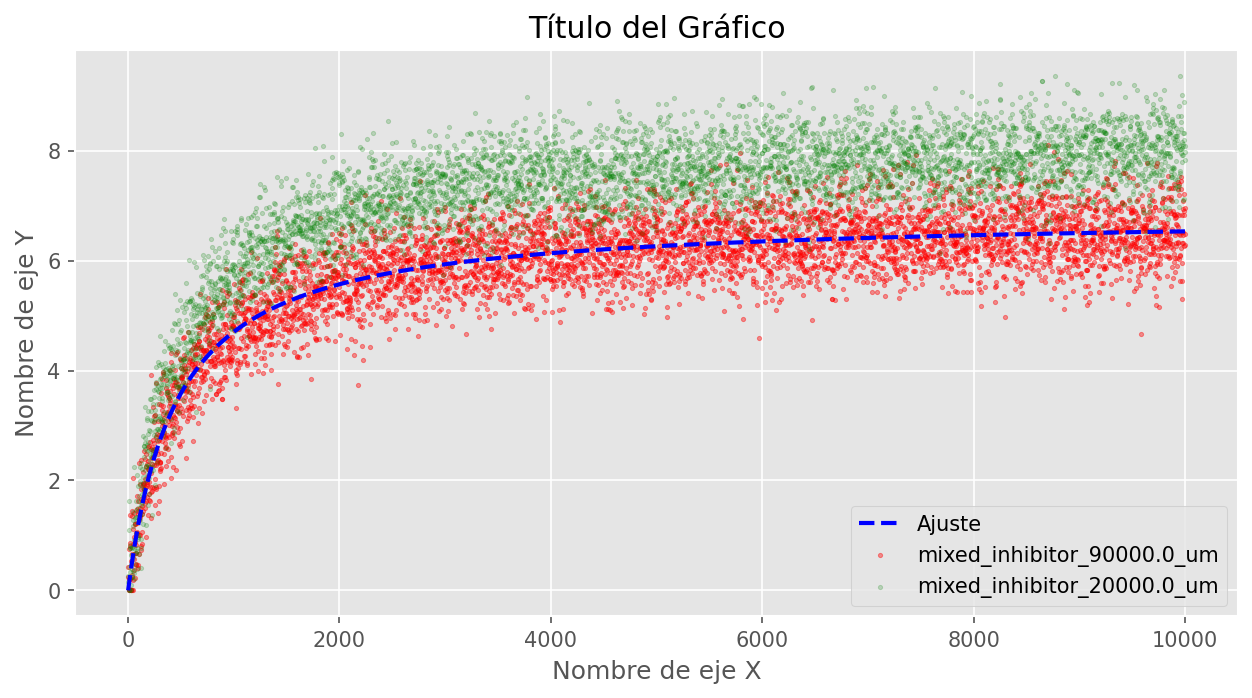

In [ ]:
# Veamos qué tan bien se ajusta el modelo a los datos experimentales
fig, ax = plt.subplots(figsize=(10,5), dpi=150)

# Primero se graficarán los datos experimentales
# (recuerde que el objeto ax será donde se grafiquen las curvas)
datos_inhibnocomp.plot(
        datos_inhibnocomp.columns[0],
        datos_inhibnocomp.columns[2],
        kind='scatter',
        color="r",
        alpha=0.4,
        s=4,
        ax=ax,
        label=datos_inhibnocomp.columns[2])

# Inhibidor 20000 uM
datos_inhibnocomp.plot(
        datos_inhibnocomp.columns[0],
        datos_inhibnocomp.columns[1],
        kind='scatter',
        color="g",
        alpha=0.2,
        s=4,
        ax=ax,
        label=datos_inhibnocomp.columns[1])

# Luego se graficarán los datos obtenidos mediante el modelo
ax.plot(
    datos_x_inhibnocomp,
    resultados_ajuste["prediccionesModelo"],
    color="b",
    alpha=1.0,
    lw=2.0,
    ls="--",
    label="Ajuste")

plt.legend()
plt.title("Título del Gráfico")     # Modificar de acuerdo a lo graficado
plt.ylabel("Nombre de eje Y")       # Modificar de acuerdo a lo graficado
plt.xlabel("Nombre de eje X")       # Modificar de acuerdo a lo graficado

## Inhibición Acompetitiva (Uncompetitive)

<p align="center">
<img src="https://raw.githubusercontent.com/AlejoArav/BIO266E/master/imgs/inhibidorAcomp.png" alt="drawing" width="400"/>
</p>

Un inhibidor acompetitivo es aquel que disminuye la $V_m$ y además **disminuye** la $K_m$. En estos casos el inhibidor se une al complejo formado entre la enzima y el sustrato ($[ES]$).

La ecuación de Michaelis-Menten modificada para inhibidores acompetitivos es:
$$
\
$$
$$
\widetilde{V}_{m} = \frac{V_{m}}{1 + \frac{[I]}{K_{iu}}}
$$
$$
\
$$
$$
\
$$
$$
\widetilde{K}_{m} = \frac{K_{m}}{1 + \frac{[I]}{K_{iu}}}
$$
$$
\
$$
$$
v = \frac{\widetilde{V}_{m} [\text{S}]}{\widetilde{K}_{m} +[\text{S}]}
$$
$$
\
$$

In [ ]:
# Gráfico Inhibidores acompetitivos
# Recomiendo no cambiar parametros de esta funcion
ce.interactive_uncomp_inhibitor_graph1(np.linspace(0, 10000, 10000//10), ce.fit_micment_uncomp_inhibitor)

AppLayout(children=(HTML(value='<H1><center>Gráfico Interactivo de Inhibidores Acompetitivos</center></H1>', l…

In [ ]:
# En primer lugar se debe leer el archivo que contiene los datos
ruta_de_archivo = "uncomp_inhibitor_data.csv"
datos_inhibacomp = pd.read_csv(ruta_de_archivo)
datos_inhibacomp

substrate_concentration  ...  uncomp_inhibitor_300000.0_um
0                      0.0000  ...                      1.580407
1                      2.0004  ...                      0.586875
2                      4.0008  ...                      0.000000
3                      6.0012  ...                      0.214171
4                      8.0016  ...                      0.000000
...                       ...  ...                           ...
4995                9991.9984  ...                      1.782628
4996                9993.9988  ...                      2.192416
4997                9995.9992  ...                      2.058869
4998                9997.9996  ...                      1.786541
4999               10000.0000  ...                      1.339485

[5000 rows x 6 columns]

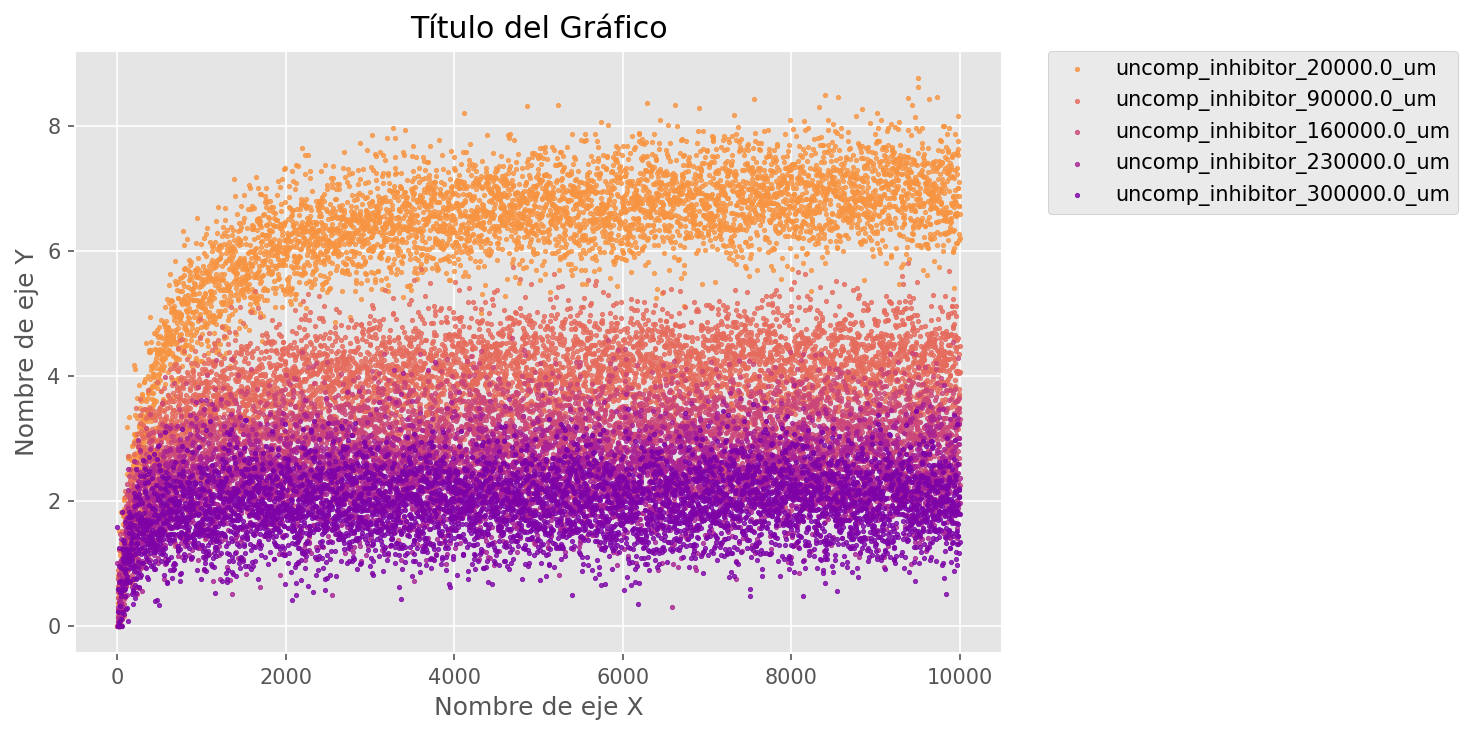

In [ ]:
colores = plt.cm.plasma_r(np.linspace(0.25, 0.75, len(list(datos_inhibacomp.columns))-1))

# Se crea la figura y un objeto ax
fig, ax = plt.subplots(figsize=(10,5), dpi=150)

# Se realiza un bucle para graficar todos los datos en una misma figura
for i in range(1, len(list(datos_inhibacomp.columns))):
    datos_inhibacomp.plot(
        datos_inhibacomp.columns[0],
        datos_inhibacomp.columns[i],
        kind='scatter',
        color=colores[i-1],
        alpha=0.8,
        s=4,
        ax=ax,
        label=datos_inhibacomp.columns[i])

plt.title("Título del Gráfico")     # Modificar de acuerdo a lo graficado
plt.ylabel("Nombre de eje Y")       # Modificar de acuerdo a lo graficado
plt.xlabel("Nombre de eje X")       # Modificar de acuerdo a lo graficado

# Opciones para ajustar la distribución de objetos en el gráfico
# No modificar a menos que desee experimentar!
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

In [ ]:
# Ajustar curvas

# Datos deben ser transformados a arreglos numpy para ser ajustados
# IMPORTANTE: Para cambiar de columna se debe cambiar el índice de datos_y
datos_x_inhibacomp = datos_inhibacomp[datos_inhibacomp.columns[0]].to_numpy()
datos_y_inhibacomp = datos_inhibacomp[datos_inhibacomp.columns[2]].to_numpy()

# Se ajustan los datos experimentales a los predecidos por el modelo
resultados_ajuste = ce.ajustar_modelo(ce.fit_micment_uncomp_inhibitor, datos_x_inhibacomp, datos_y_inhibacomp)

# resultados_ajuste es un diccionario que tiene dos llaves:
# "prediccionesModelo": la cual corresponde a un arreglo de datos generados por el modelo
# "difDatosModelo": la cual corresponde a un arreglo de datos y se utilizará para graficar los residuales

Por favor ingrese el límite inferior de búsqueda para inhibitor_concentration : 
88000
Por favor ingrese el límite superior de búsqueda para inhibitor_concentration : 
92000
Por favor ingrese el límite inferior de búsqueda para k_iu : 
0
Por favor ingrese el límite superior de búsqueda para k_iu : 
92000
Por favor ingrese el límite inferior de búsqueda para initial_enzyme : 
0
Por favor ingrese el límite superior de búsqueda para initial_enzyme : 
0.01
Parámetros Ajustados:
inhibitor_concentration : 91165.94230457876
k_iu : 89292.06190379335
initial_enzyme : 1.688558859012672e-05

A partir de los parámetros ajustados se calcula la V_max y Km:

V_max: 0.0719
Km: 222.6636


R cuadrado : 0.5164457758212099


In [ ]:
60*0.0719

4.314

Text(0.5, 0, 'Nombre de eje X')

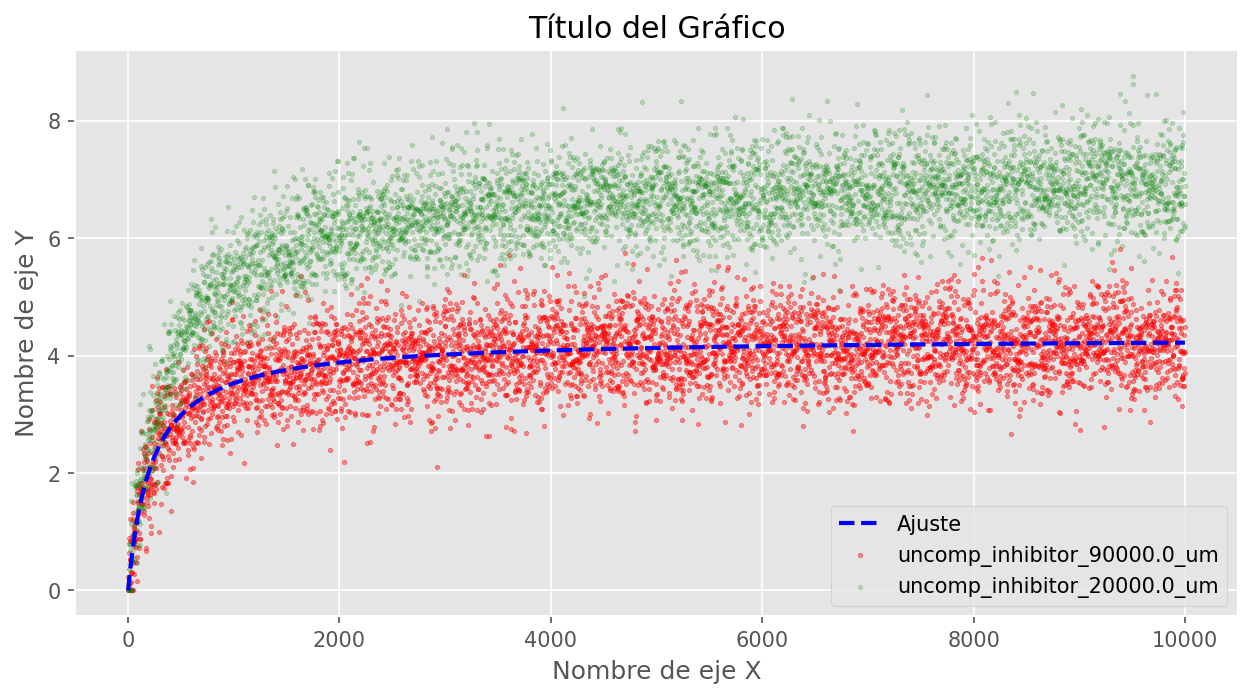

In [ ]:
# Veamos qué tan bien se ajusta el modelo a los datos experimentales
fig, ax = plt.subplots(figsize=(10,5), dpi=150)

# Primero se graficarán los datos experimentales
# Recuerde seleccionar la columna correspondientes a los datos elegidos
datos_inhibacomp.plot(
        datos_inhibacomp.columns[0],
        datos_inhibacomp.columns[2],
        kind='scatter',
        color="r",
        alpha=0.4,
        s=4,
        ax=ax,
        label=datos_inhibacomp.columns[2])

# Inhibidor 20000 uM
datos_inhibacomp.plot(
        datos_inhibacomp.columns[0],
        datos_inhibacomp.columns[1],
        kind='scatter',
        color="g",
        alpha=0.2,
        s=4,
        ax=ax,
        label=datos_inhibacomp.columns[1])

# Luego se graficarán los datos obtenidos mediante el modelo
ax.plot(
    datos_x_inhibacomp,
    resultados_ajuste["prediccionesModelo"],
    color="b",
    alpha=1.0,
    lw=2.0,
    ls="--",
    label="Ajuste")

plt.legend()
plt.title("Título del Gráfico")     # Modificar de acuerdo a lo graficado
plt.ylabel("Nombre de eje Y")       # Modificar de acuerdo a lo graficado
plt.xlabel("Nombre de eje X")       # Modificar de acuerdo a lo graficado

## Preguntas a desarrollar

**Investigue y proponga un inhibidor de la $\beta$-galactosidasa. Mencione si actúa como inhibidor competitivo, mixto o acompetitivo y el mecanismo molecular de inhibición (qué grupos químicos del inhibidor interactuan con el sitio activo y cómo)**